In [147]:
import os
import sys
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.utils import shuffle
from PIL import Image
import cv2
import pandas as pd
import time

In [148]:
cwd = os.getcwd()

train_path = os.getcwd() +'/data/train_set/train_set/'
train_labels = os.getcwd() +'/data/train_labels.csv'
rgb_img = plt.imread(train_path+'train_12215.jpg')

nr_files = len(os.listdir(train_path))

df = pd.read_csv(train_labels)
df.head()

,img_name,label
0,train_1.jpg,21
1,train_2.jpg,29
2,train_3.jpg,17
3,train_4.jpg,21
4,train_5.jpg,50


In [149]:
df['img_name']

0            train_1.jpg
1            train_2.jpg
2            train_3.jpg
3            train_4.jpg
4            train_5.jpg
              ...       
30607    train_30608.jpg
30608    train_30609.jpg
30609    train_30610.jpg
30610    train_30611.jpg
30611    train_30612.jpg
Name: img_name, Length: 30612, dtype: object

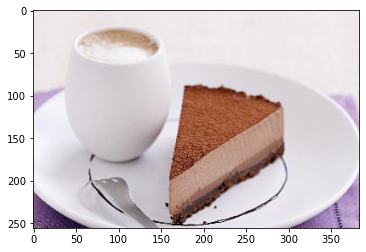

In [150]:
plt.imshow(rgb_img)

In [158]:
X_train = np.zeros((nr_files, 200, 200,1))
print(X_train.shape)
Y_train = np.zeros(nr_files)
names = []
image_height = 200
image_width = 200

print(X_train[0])

(30612, 200, 200, 1)
[[[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 ...

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  ...
  [0.]
  [0.]
  [0.]]]


In [162]:
# first grayscaled then resized
# compare to first resized than grayscaled
start = time.time()
nr = 0
for filename in os.listdir(train_path):
    
    # Convert image to numpy array
    image_array = np.asarray(Image.open(train_path+filename))
#     # Convert imiage to grayscale
# #     img = cv2.cvtColor(image_array, cv2.COLOR_BGR2GRAY)
# #     print(img.shape)
#     # Resize image to (image_height, image_width)
# #     image_resized = resize(img, (image_height, image_width), anti_aliasing=False)
    
    
    # Resize image to (image_height, image_width)
    image_resized = tf.image.resize(image_array, [image_height, image_width], preserve_aspect_ratio=False)
    
    # Convert imiage to grayscale
    grayscaled = tf.image.rgb_to_grayscale(image_resized)
    
    
    # add image to training matrix
    X_train[nr] = grayscaled.numpy()
    
    
    # Get Labels and store in train
    row = df.loc[df['img_name'] == filename]
    Y_train[nr] = int(row['label'])
    
    names.append(filename)
    # Print progress
    print('% Converted: ', (nr+1)/nr_files, end='\r')
    nr += 1
end = time.time()
print(end - start)

195.995229005813699967333071997945540.162289298314386520.5664118646282503 0.901313210505684


In [168]:
# split the data
train_index = round(len(X)* 0.8)

print(X_train[:train_index].shape)

X_tr = X_train[:train_index]
X_te = X_train[train_index:]

# print(X_train)
Y_tr = Y_train[:train_index]
Y_te = Y_train[train_index:]

# train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
# valid_data = tf.data.Dataset.from_tensor_slices((X_test, Y_test))

# print(X_train.shape)

(24490, 200, 200, 1)


In [170]:
# create the CNN

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))




In [ ]:
model.summary()

In [175]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [176]:

history = model.fit(X_tr, Y_tr, epochs=10, 
                    validation_data=(X_te, Y_te))






Epoch 1/10


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [1254528,32] and labels shape [32]
	 [[node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-176-6462bbe66540>:1) ]] [Op:__inference_train_function_10713176]

Function call stack:
train_function


In [ ]:
print(X_train[0].shape)